In [44]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [45]:
dados['Valor'].str.split()

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

In [46]:
dados['Valor'].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [47]:
dados[['Moeda', 'Valor_anuncio', 'Tipo_anuncio']] = dados['Valor'].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [48]:
# Eliminando anúncios do tipo aluguel ('/Mês', '/Ano', '/Dia')
dados["Tipo_anuncio"].isnull()

0         True
1         True
2         True
3         True
4         True
         ...  
10003     True
10004     True
10005     True
10006    False
10007     True
Name: Tipo_anuncio, Length: 10008, dtype: bool

In [49]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [50]:
# Convertendo a coluna 'Valor_anuncio' para o tipo numérico
dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_anuncio, Length: 9156, dtype: float64

In [51]:
dados_vendas["Valor_de_venda"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_de_venda
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.0
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.0
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.0
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.0


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
dados_vendas["Valor_m2"] = dados_vendas['Valor_de_venda']/dados_vendas['Metragem']
dados_vendas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_de_venda,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0,7000.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0,7459.677419
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0,3040.000000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0,2209.677419
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0,5400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.0,5617.977528
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.0,7000.000000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.0,3801.652893
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.0,5121.951220


In [55]:
dados_bairro = dados_vendas.groupby("Bairro").sum()
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_de_venda,Valor_m2
Bairro,,,,,,
Aclimação,19447,258,240,230,1.392928e+08,6.048374e+05
Alto da Boa Vista,3351,33,41,37,1.913000e+07,4.679655e+04
Alto da Lapa,23940,252,308,320,1.666535e+08,6.085382e+05
Alto da Mooca,5401,66,52,73,2.368340e+07,1.138348e+05
Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09,4.158623e+06
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3.260000e+06,2.233564e+04
Água Branca,2083,37,39,27,1.471800e+07,8.722937e+04
Água Fria,1985,34,41,30,1.112500e+07,7.009325e+04


In [56]:
dados_bairro["Valor_m2_bairro"] = dados_bairro["Valor_de_venda"]/dados_bairro["Metragem"]
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_de_venda,Valor_m2,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,1.392928e+08,6.048374e+05,7162.688384
Alto da Boa Vista,3351,33,41,37,1.913000e+07,4.679655e+04,5708.743659
Alto da Lapa,23940,252,308,320,1.666535e+08,6.085382e+05,6961.299081
Alto da Mooca,5401,66,52,73,2.368340e+07,1.138348e+05,4385.002777
Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09,4.158623e+06,11126.342330
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3.260000e+06,2.233564e+04,4283.837057
Água Branca,2083,37,39,27,1.471800e+07,8.722937e+04,7065.770523
Água Fria,1985,34,41,30,1.112500e+07,7.009325e+04,5604.534005


In [57]:
dados_bairro.reset_index(inplace=True)
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_de_venda,Valor_m2,Valor_m2_bairro
0,Aclimação,19447,258,240,230,1.392928e+08,6.048374e+05,7162.688384
1,Alto da Boa Vista,3351,33,41,37,1.913000e+07,4.679655e+04,5708.743659
2,Alto da Lapa,23940,252,308,320,1.666535e+08,6.085382e+05,6961.299081
3,Alto da Mooca,5401,66,52,73,2.368340e+07,1.138348e+05,4385.002777
4,Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09,4.158623e+06,11126.342330
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3.260000e+06,2.233564e+04,4283.837057
693,Água Branca,2083,37,39,27,1.471800e+07,8.722937e+04,7065.770523
694,Água Fria,1985,34,41,30,1.112500e+07,7.009325e+04,5604.534005
695,Água Funda,278,6,5,4,1.090000e+06,7.753725e+03,3920.863309


In [58]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index

In [59]:
dados_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_de_venda,Valor_m2,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09,4.158623e+06,11126.342330
19,Brooklin Paulista,70002,778,862,832,4.757968e+08,1.627342e+06,6796.902788
57,Cidade Jardim,132220,789,1008,1172,1.164211e+09,1.635693e+06,8805.104372
155,Jardim Europa,118898,795,993,1056,2.414173e+09,4.192164e+06,20304.571145
168,Jardim Guedala,972212,1443,2027,2161,1.801166e+09,2.833883e+06,1852.646940
187,Jardim Leonor,97141,697,941,902,6.463264e+08,1.115859e+06,6653.486880
227,Jardim Paulista,130283,1028,1231,1171,2.136081e+09,4.279262e+06,16395.700130
338,Pacaembu,100285,774,889,1028,8.679565e+08,1.753672e+06,8654.898539
396,Planalto Paulista,59250,636,768,713,3.749070e+08,1.186381e+06,6327.544304
564,Vila Madalena,66250,739,786,712,5.832530e+08,1.792770e+06,8803.819321


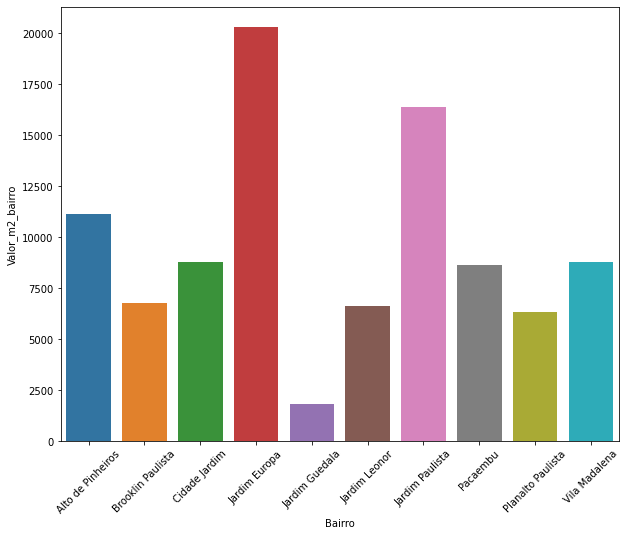

In [60]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", data=dados_bairro.query("Bairro in @top_bairros"))
# Roacionando o tick (que são os 'índices' na label)
ax.tick_params(axis='x', rotation=45)

#### Boxplot

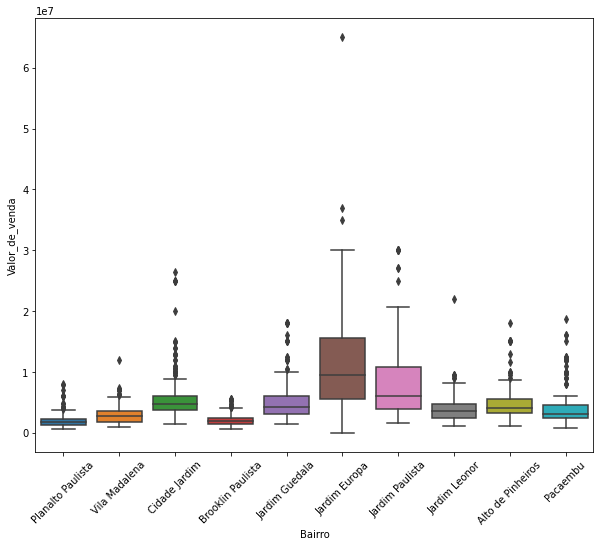

In [61]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x='Bairro', y="Valor_de_venda")
ax.tick_params(axis='x', rotation=45)
plt.show()

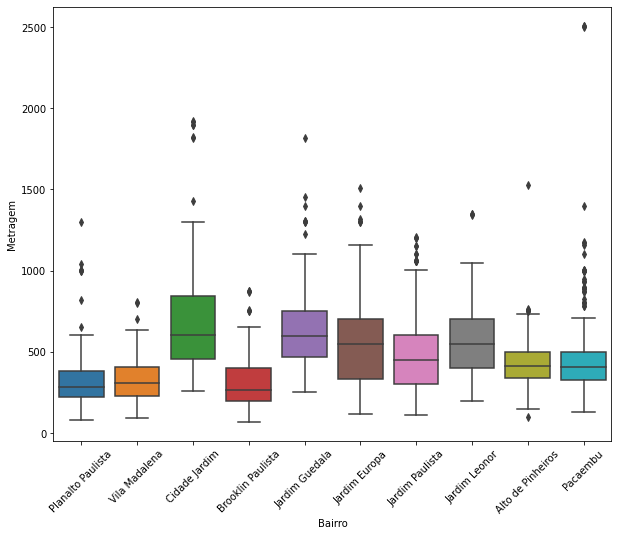

In [62]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Metragem < 30000"), x='Bairro', y="Metragem")
ax.tick_params(axis='x', rotation=45)
plt.show()

### Dados do IBGE

In [ ]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
base_ibge = pd.read_csv(ibge_url, sep = ';')
base_ibge.head()

## Desafios - Aula 3:

1.   Remover o outlier do Jardim Europa e ver se dá diferença com o primeiro boxplot;
2.   Tentar vincular dados do IBGE com os dados de imóveis;
3.   'Brincar' um pouco com o 'groupby', agrupando por mais de uma categoria e realizar as análises;
4.   Organizar o Colab.

### 1

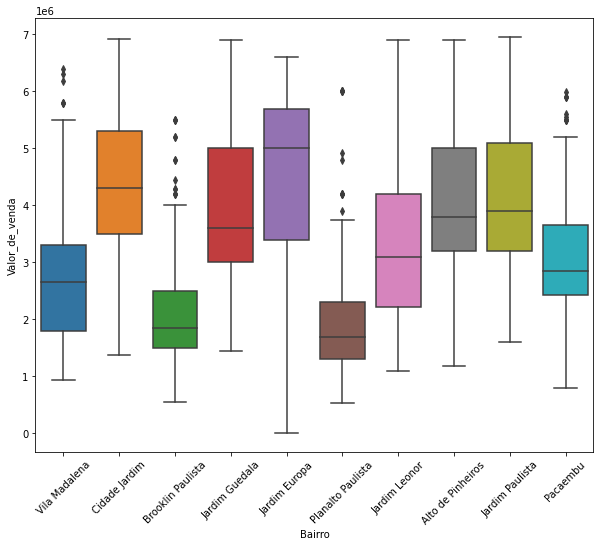

In [64]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Valor_de_venda < 7000000"), x='Bairro', y="Valor_de_venda")
ax.tick_params(axis='x', rotation=45)
plt.show()

### 2

In [79]:
base_ibge.head()

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,32","2091,32","8532451,78","2164,55","8673276,78","1227,41","4285771,99","1713,75","5152087,86",NaN
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,09","1650,09","3983441,31","1717,44","4030519,99","1045,78","2572133,32","1468,08","2991546,94",NaN
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"3,08","1280,43","5474593,06","2349,53","7553913,02","902,97","2735492,52","1786,79","3837674,74",NaN
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,26","1119,59","3572955,1","1859,13","4567289,5","869,09","2122409,02","1567,41","2735383,24",NaN
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,"2,35","1416,9","2240207,58","1581,66","2240109,39","917,71","1570047,75","1356,35","1725877,85",NaN


In [78]:
base_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_setor            18363 non-null  int64  
 1   Cod_Grandes Regi�es  18363 non-null  int64  
 2   Nome_Grande_Regiao   18363 non-null  object 
 3   Cod_UF               18363 non-null  int64  
 4   Nome_da_UF           18363 non-null  object 
 5   Cod_meso             18363 non-null  int64  
 6   Nome_da_meso         18363 non-null  object 
 7   Cod_micro            18363 non-null  int64  
 8   Nome_da_micro        18363 non-null  object 
 9   Cod_RM               18363 non-null  int64  
 10  Nome_da_RM           18363 non-null  object 
 11  Cod_municipio        18363 non-null  int64  
 12  Nome_do_municipio    18363 non-null  object 
 13  Cod_distrito         18363 non-null  int64  
 14  Nome_do_distrito     18363 non-null  object 
 15  Cod_subdistrito      18363 non-null 

In [ ]:
# A documentação tem algus erros, pois alguns códigos das variáveis não batem
base_ibge["Nome_do_subdistrito"]

In [ ]:
ibge_editado = base_ibge.copy()
ibge_editado.head()

In [ ]:
del ibge_editado['Cod_setor']

In [ ]:
del ibge_editado['Nome_Grande_Regiao']

In [ ]:
ibge_editado = ibge_editado.drop(columns=['Cod_UF'])

In [ ]:
ibge_editado = ibge_editado.drop(["Cod_meso", "Nome_da_meso", "Cod_micro", "Cod_RM", "Nome_da_RM"], axis=1)


In [ ]:
ibge_editado = ibge_editado.drop(["Nome_da_micro", "Cod_municipio", "Cod_distrito", "Cod_subdistrito"], axis=1)

In [103]:
ibge_editado['Nome_do_distrito'].value_counts()

GRAJA�           609
CAP�O REDONDO    414
JABAQUARA        407
JARDIM �NGELA    406
SAPOPEMBA        381
                ... 
MARSILAC          45
S�                43
JAGUARA           34
BARRA FUNDA       32
PARI              28
Name: Nome_do_distrito, Length: 96, dtype: int64

In [105]:
ibge_editado['Nome_do_bairro'].value_counts()

S�O PAULO (todos os setores)    18363
Name: Nome_do_bairro, dtype: int64

##### Na ausência de informações na coluna 'Nome_do_bairro', preferi trabalhar com a coluna 'Nome_do_distrito'

In [106]:
ibge_editado = ibge_editado.drop(["Nome_do_subdistrito", "Cod_bairro", "Nome_do_bairro"], axis=1)

In [ ]:
ibge_editado.rename(columns={'Nome_do_municipio': 'Cidade'}, inplace = True)

In [ ]:
ibge_editado.rename(columns={'Nome_do_distrito': 'Bairro'}, inplace = True)
ibge_editado

In [ ]:
ibge_editado['Cidade'] = ibge_editado.Cidade.str.replace('�', 'Ã', regex = True)

In [ ]:
ibge_editado['Bairro'] = ibge_editado.Bairro.str.replace('�', 'Á', regex = True)

In [118]:
ibge_editado.drop(['Cod_Grandes Regi�es', 'Nome_da_UF '], axis = 1,
      inplace = True)
ibge_editado.head()

,Cidade,Bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,SÃO PAULO,ÁGUA RASA,1,0,266.0,800.0,"3,01","2,32","2091,32","8532451,78","2164,55","8673276,78","1227,41","4285771,99","1713,75","5152087,86",NaN
1,SÃO PAULO,ÁGUA RASA,1,0,306.0,913.0,"2,98","2,09","1650,09","3983441,31","1717,44","4030519,99","1045,78","2572133,32","1468,08","2991546,94",NaN
2,SÃO PAULO,ÁGUA RASA,1,0,189.0,625.0,"3,31","3,08","1280,43","5474593,06","2349,53","7553913,02","902,97","2735492,52","1786,79","3837674,74",NaN
3,SÃO PAULO,ÁGUA RASA,1,0,181.0,572.0,"3,16","2,26","1119,59","3572955,1","1859,13","4567289,5","869,09","2122409,02","1567,41","2735383,24",NaN
4,SÃO PAULO,ÁGUA RASA,1,0,240.0,754.0,"3,14","2,35","1416,9","2240207,58","1581,66","2240109,39","917,71","1570047,75","1356,35","1725877,85",NaN


In [119]:
ibge_editado['Bairro'].value_counts()

GRAJAÁ           609
CAPÁO REDONDO    414
JABAQUARA        407
JARDIM ÁNGELA    406
SAPOPEMBA        381
                ... 
MARSILAC          45
SÁ                43
JAGUARA           34
BARRA FUNDA       32
PARI              28
Name: Bairro, Length: 96, dtype: int64